# 5 Data Querying

In this chapter we are using the encoder model to extract 10 features from the images in the whole dataset. Afterwards we use these features to search for the images which are most similar to a user specified image by calculating one of three distance measurements.

## Imports

In [1]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Reshape, UpSampling2D, Dense, Conv1D, Conv2D, MaxPooling2D, GlobalMaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import numpy as np
import os
import pickle
from sklearn.metrics.pairwise import euclidean_distances
import sys

#### Load Data

In [2]:
x_train = pickle.load(open( "./data/x_train.p", "rb" ))
y_train = pickle.load(open( "./data/y_train.p", "rb" ))
x_test  = pickle.load(open( "./data/x_test.p",  "rb" ))
y_test  = pickle.load(open( "./data/y_test.p",  "rb" ))

#### Load Model

In [3]:
autoencoder = keras.models.load_model('./models/autoencoder.hdf5')
encoder = keras.models.load_model('./models/encoder.hdf5')

## Query

#### Encode full dataset

Using the encoder model we extract 10 features from all images in the combined test and train dataset.

In [4]:
X = np.r_[x_train, x_test]
c10encoder_X = encoder.predict(X)

#### Select 20 images 

We are selecting the first 20 images of the combined dataset as test samples. Following we will search for the most similar images for each of the 20 images.

In [5]:
X_20 = X[:20]

#### Encode sample images

In [6]:
# encode 20 examples
c10encoder_20 = encoder.predict(X_20)

#### Implement different distance metrics for calculating pairwise distances of two data tuples 

Use 'euclid', 'manhatten' or 'cosine' as metric input parameter when using this function.

In [7]:
def getPairwiseDistances(tupleA, tupleB, metric):
    dists = np.empty([len(tupleA), len(tupleB)])
    
    if metric == 'euclid':
        dists = euclidean_distances(tupleA, tupleB)
        
    if metric == 'manhatten':
        for i in range(0, len(tupleA)):
            for j in range(0, len(tupleB)):
                dists[i, j] = sum(abs(val1-val2) for val1, val2 in zip(tupleA[i], tupleB[j]))
                
    if metric == 'cosine':
        for i in range(0, len(tupleA)):
            for j in range(0, len(tupleB)):
                dists[i, j] = 1 - np.dot(tupleA[i], tupleB[j])/(np.linalg.norm(tupleA[i]) * np.linalg.norm(tupleB[j]))
        
    return dists

#### Calculate pairwise distances using "euclid"

In [8]:
dists = getPairwiseDistances(c10encoder_20, c10encoder_X, 'euclid')

#### Plot most similar images

In [9]:
# definition to show original image and reconstructed image
def showDecodedImages(orig, dec, queryIndex  = 0, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))
    plt.suptitle("Query " + str(queryIndex + 1) , fontsize=16)

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if(i == 0): ax.set_title("Reference Image:")

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if(i == 0): ax.set_title("Similar Images:")
        
    plt.show()

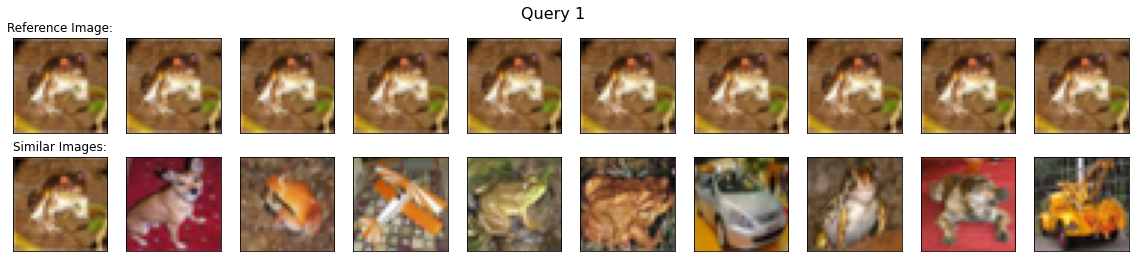

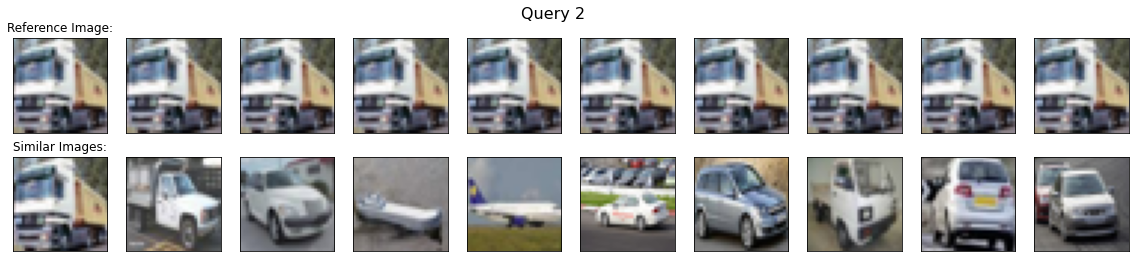

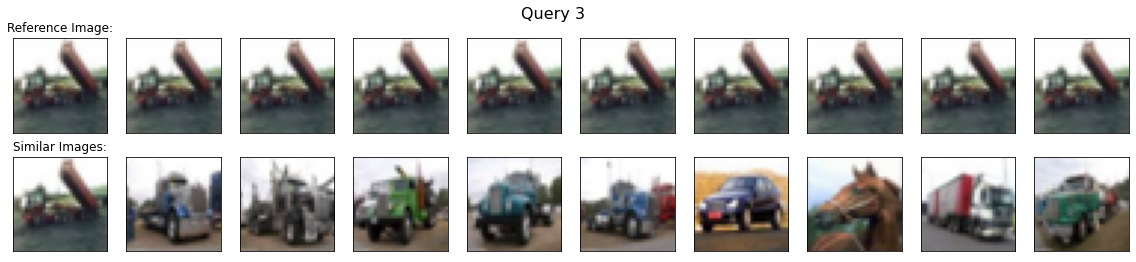

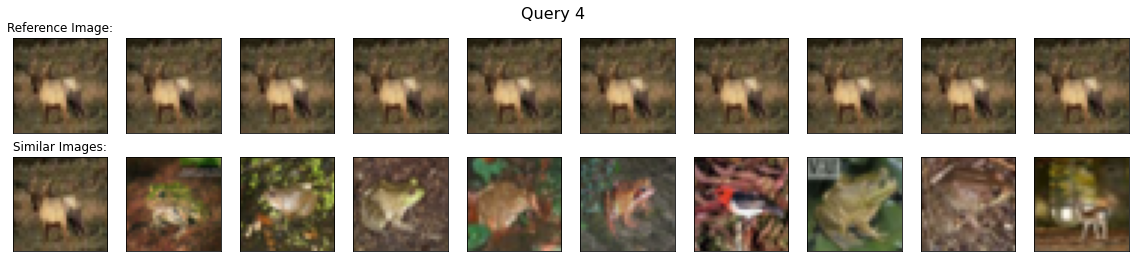

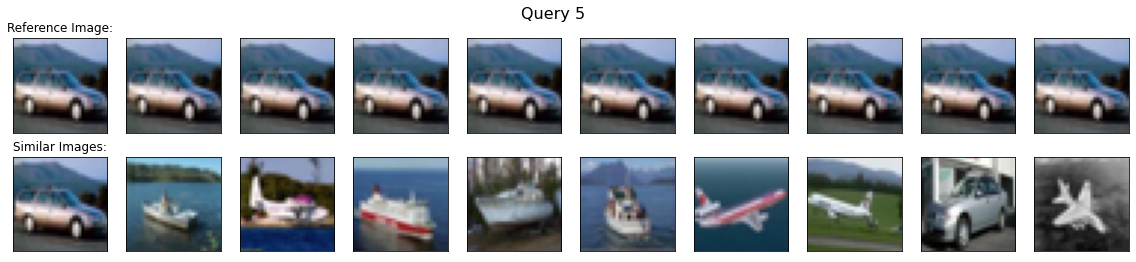

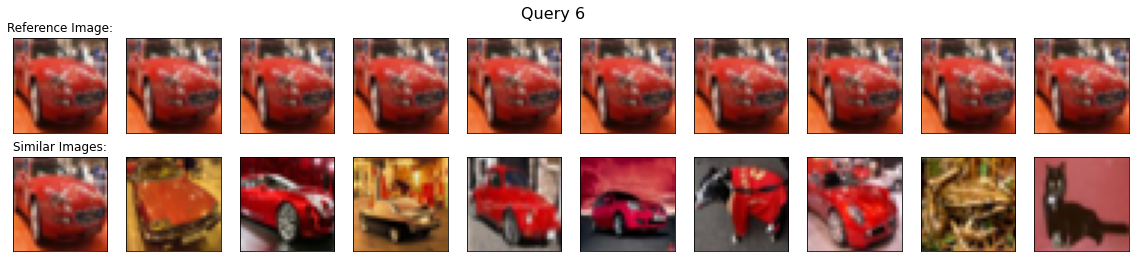

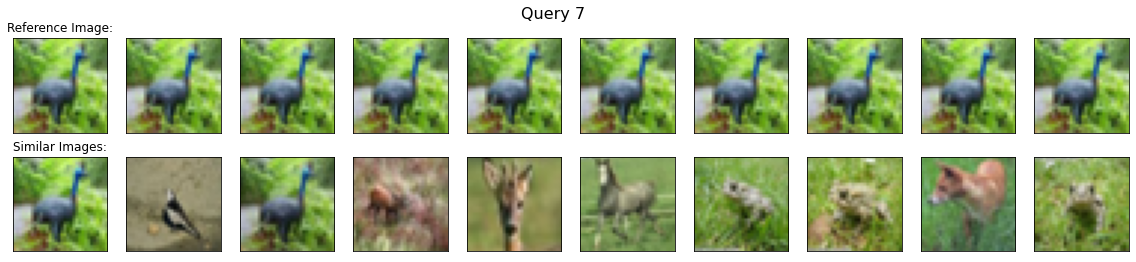

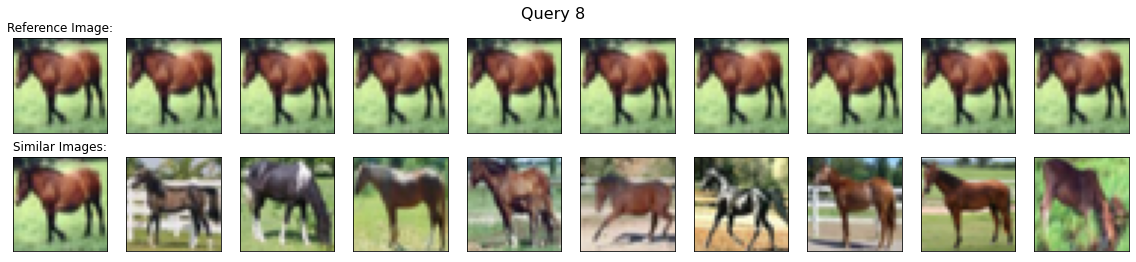

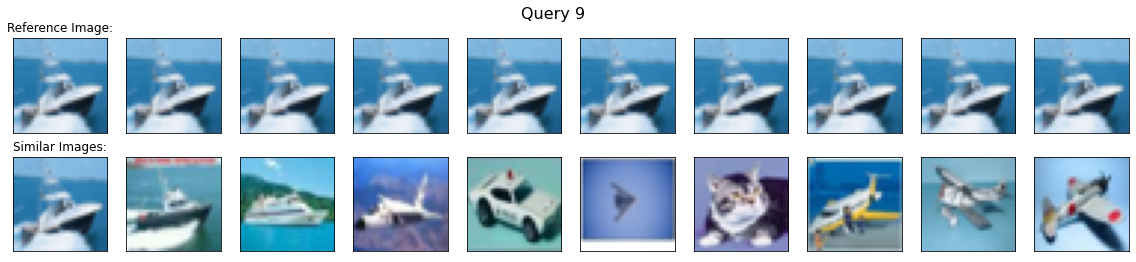

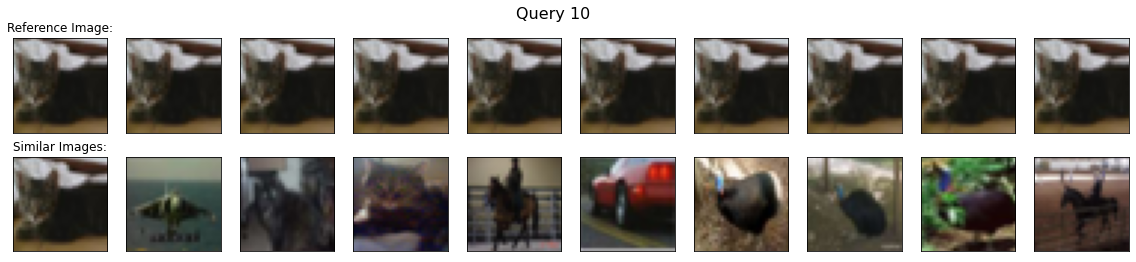

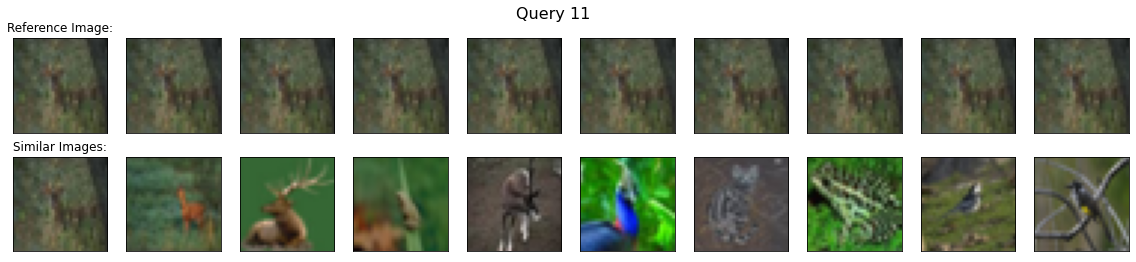

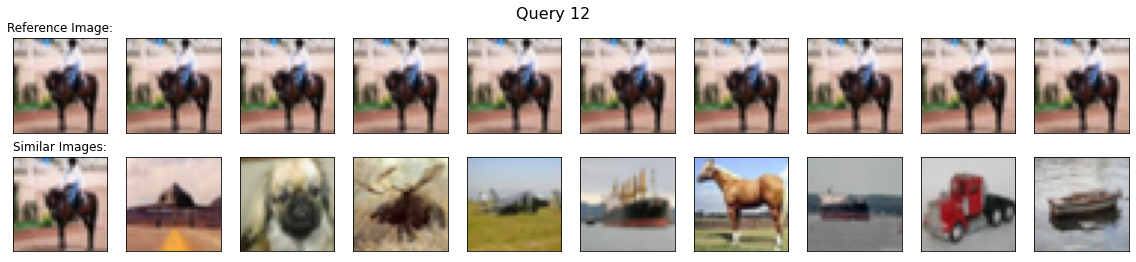

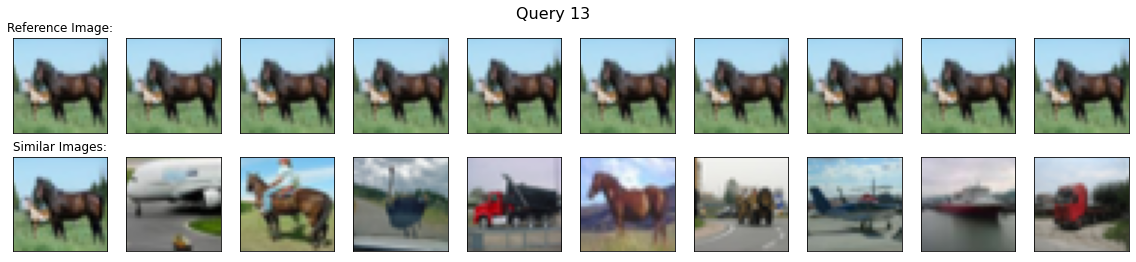

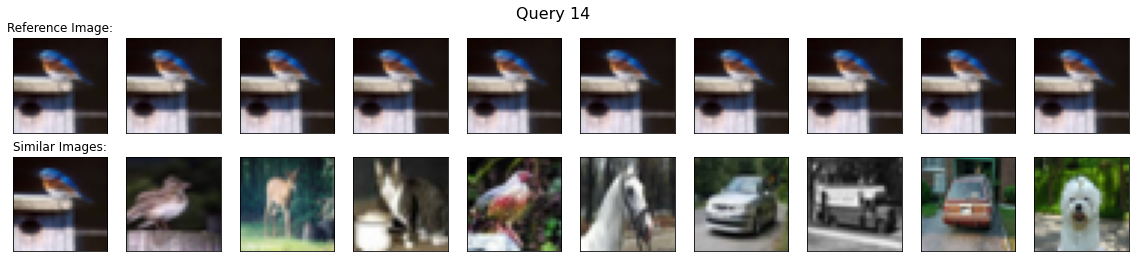

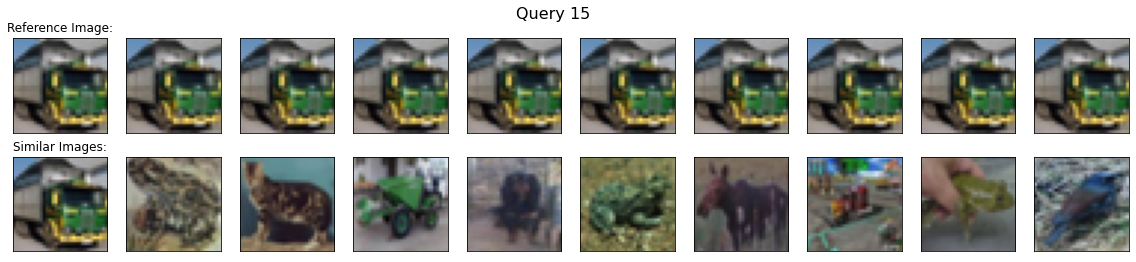

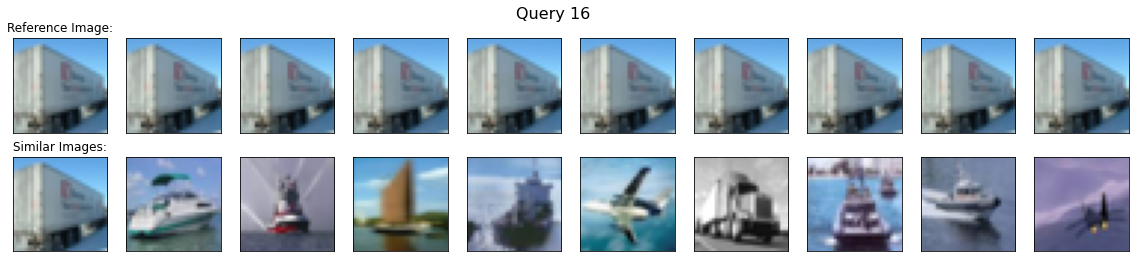

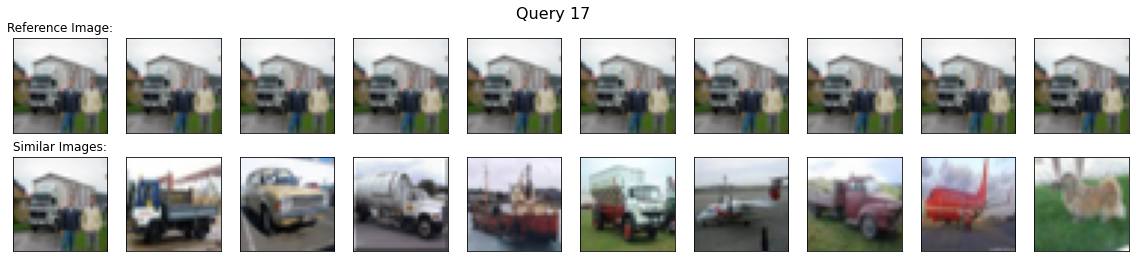

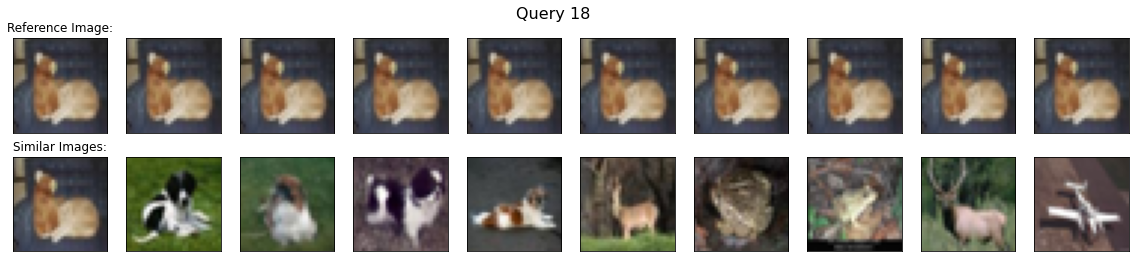

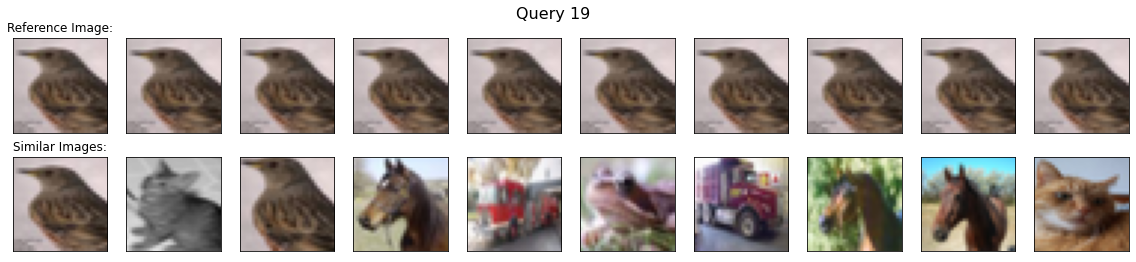

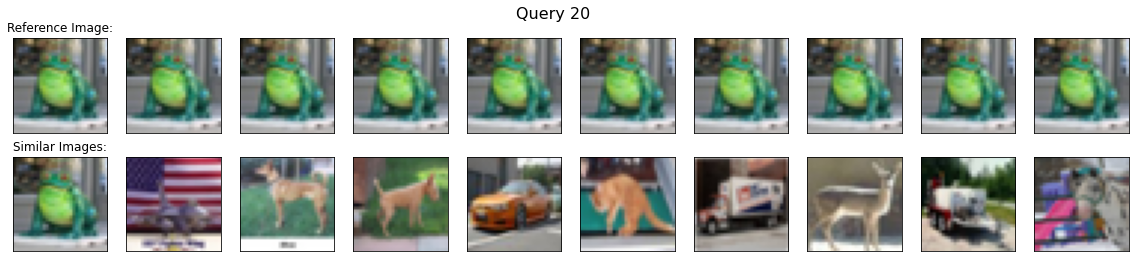

In [10]:
nofSimImgs = 10
#queryIndex = 6

for queryIndex in range(0,20):

    originalImages = []
    similarOriginalImages = []

    # copy distance matrix to allow modifications
    cache = np.array(dists)

    for i in range(0, nofSimImgs):
        originalImages.append(X_20[queryIndex])

        index = np.where(cache[queryIndex] == cache[queryIndex].min())[0][0]
        cache[queryIndex][index] = sys.float_info.max
        similarOriginalImages.append(X[index])

    showDecodedImages(originalImages, similarOriginalImages, queryIndex)

#### Calculate pairwise distances using "cosine"

In [11]:
dists = getPairwiseDistances(c10encoder_20, c10encoder_X, 'cosine')

#### Plot most similar images

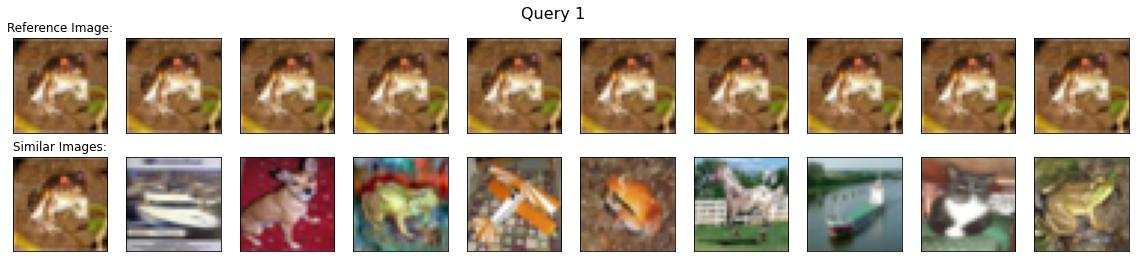

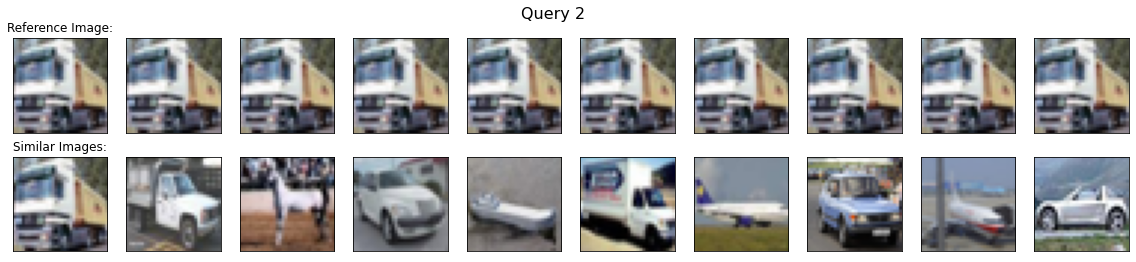

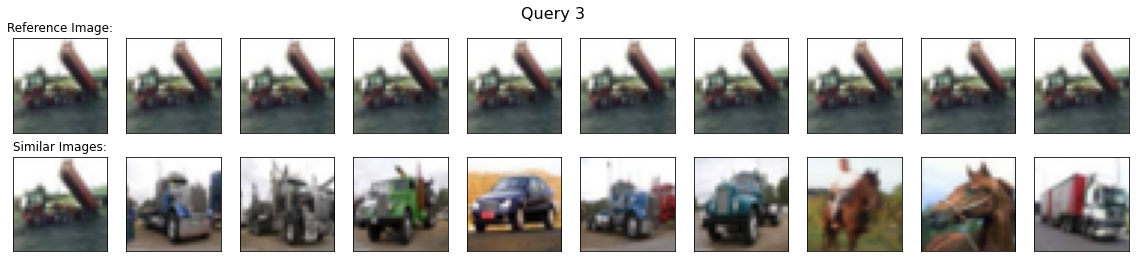

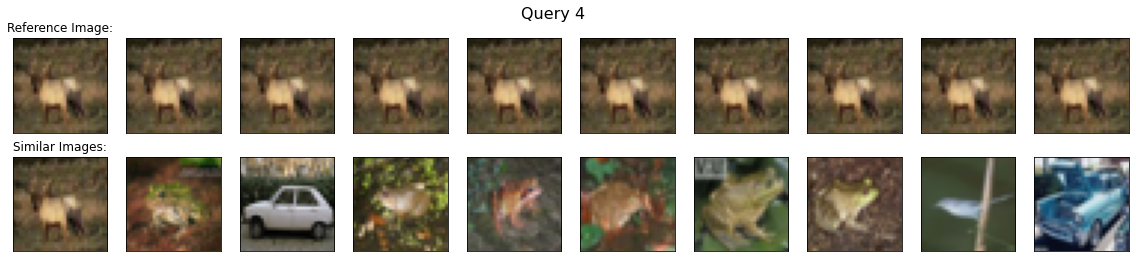

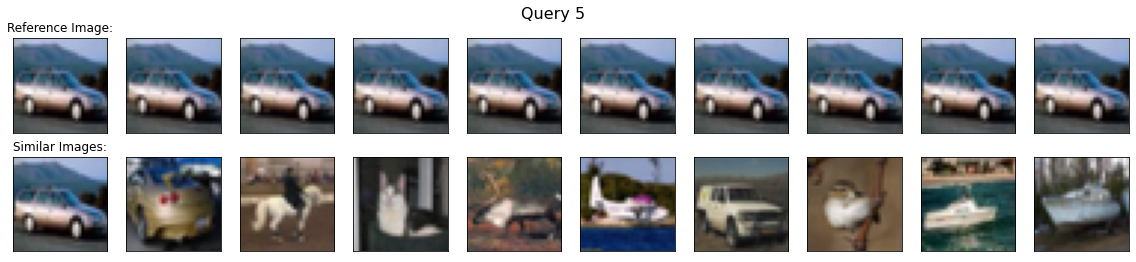

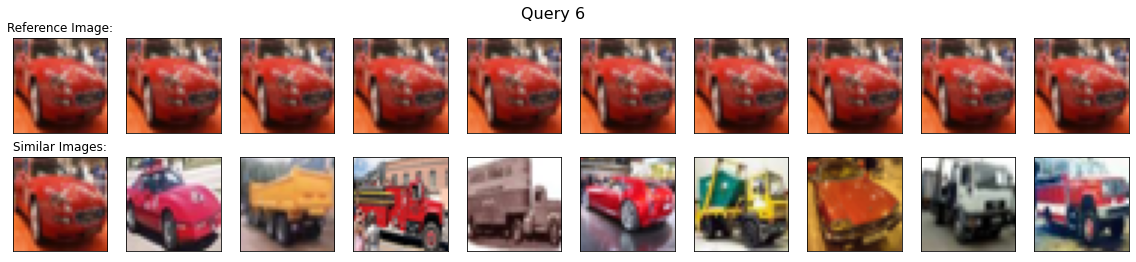

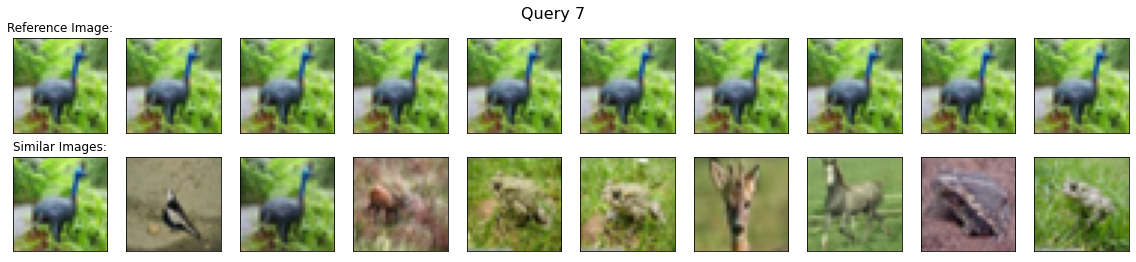

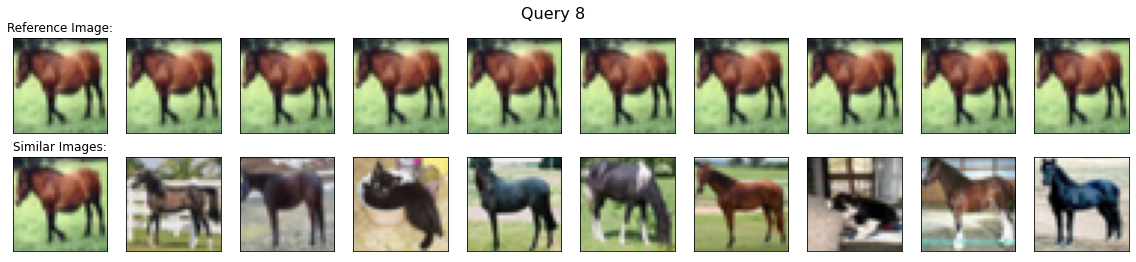

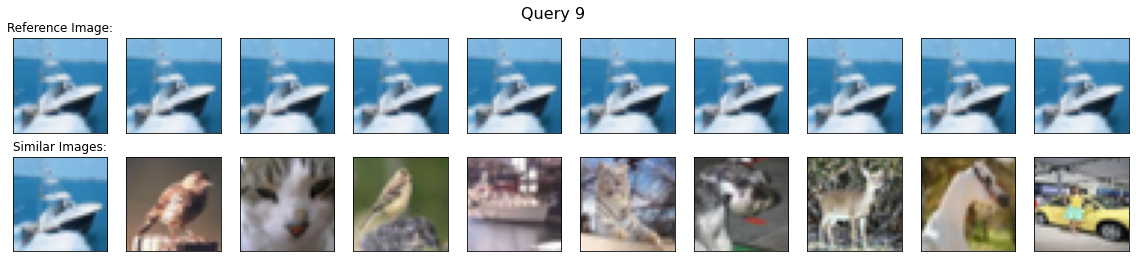

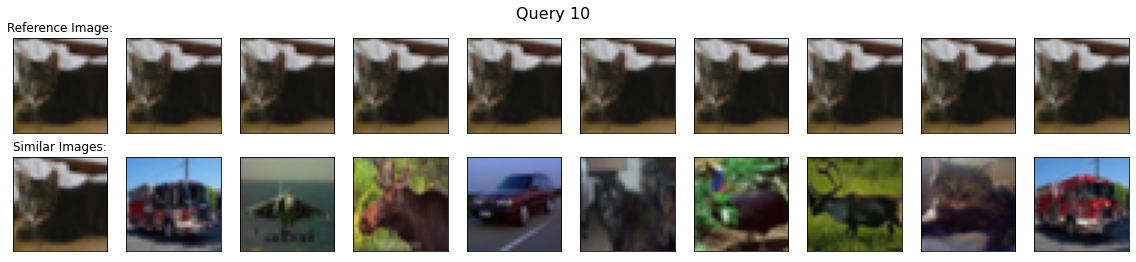

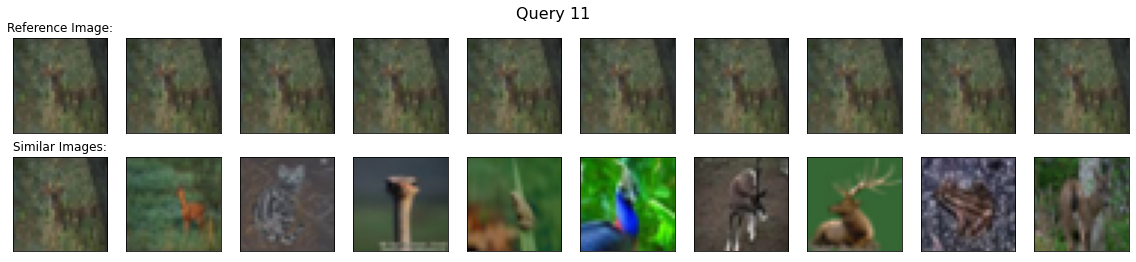

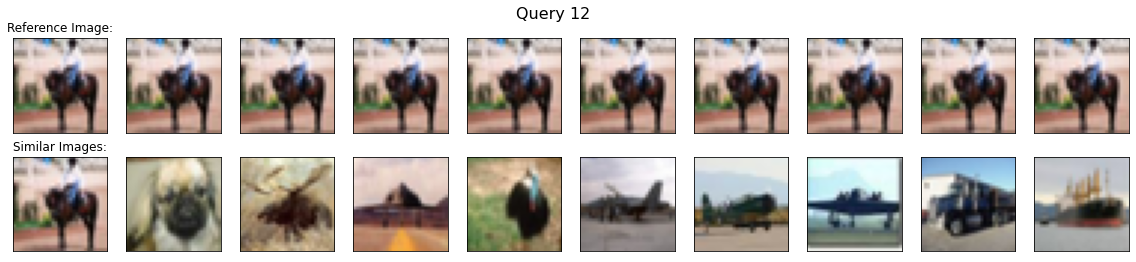

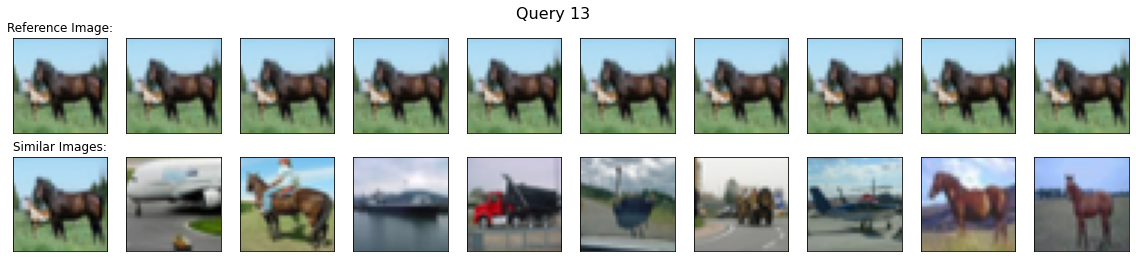

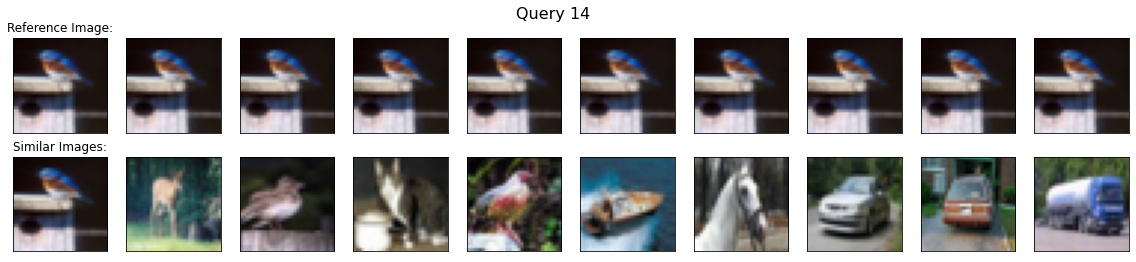

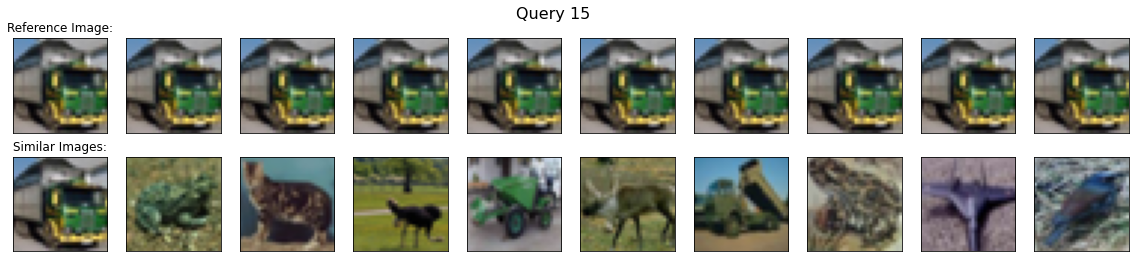

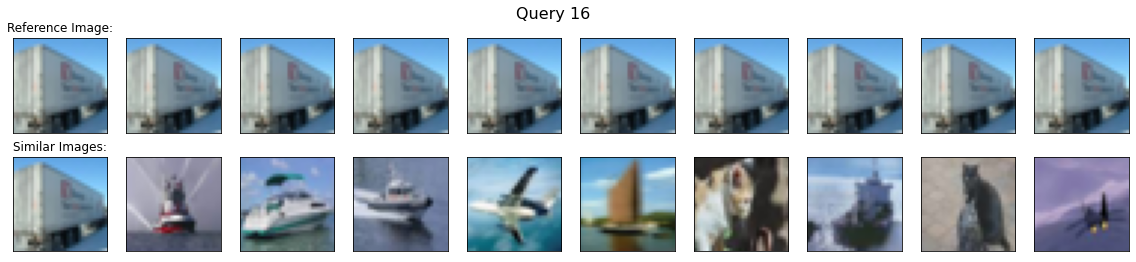

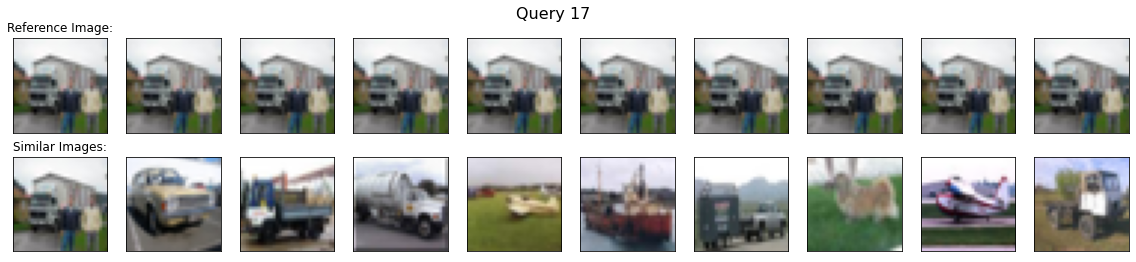

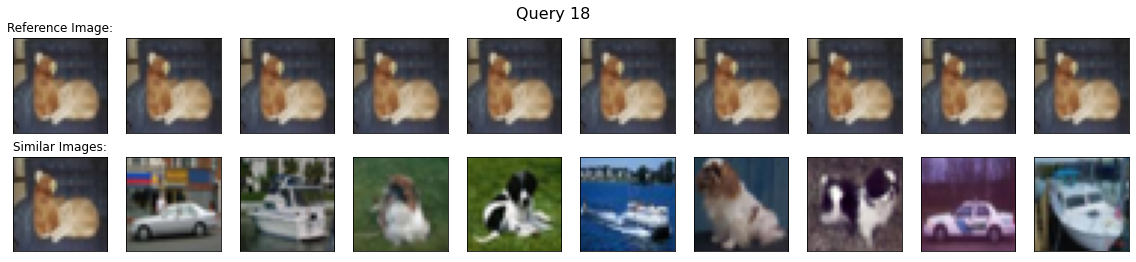

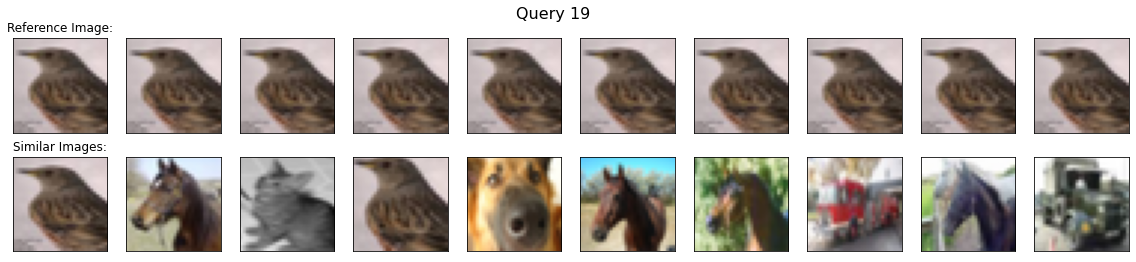

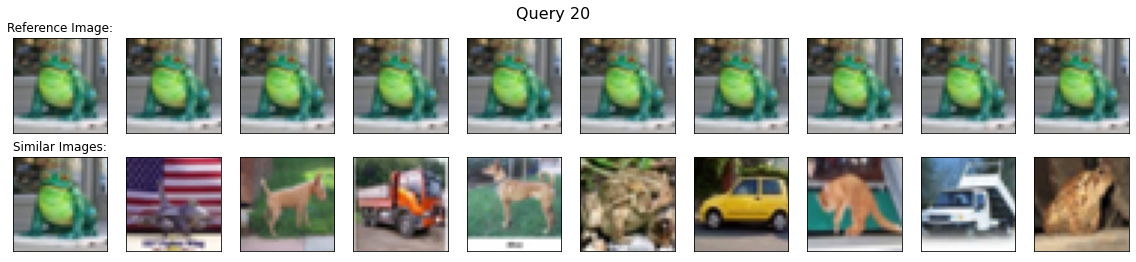

In [12]:
nofSimImgs = 10
#queryIndex = 6

for queryIndex in range(0,20):

    originalImages = []
    similarOriginalImages = []

    # copy distance matrix to allow modifications
    cache = np.array(dists)

    for i in range(0, nofSimImgs):
        originalImages.append(X_20[queryIndex])

        index = np.where(cache[queryIndex] == cache[queryIndex].min())[0][0]
        cache[queryIndex][index] = sys.float_info.max
        similarOriginalImages.append(X[index])

    showDecodedImages(originalImages, similarOriginalImages, queryIndex)